#Boosting:-

#Theory:-

1. What is Boosting in Machine Learning?
 - Boosting is an ensemble technique that combines the output of several weak learners to form a strong learner. It focuses on training models sequentially, each one correcting the errors made by the previous.

2. How does Boosting differ from Bagging?

 - | Aspect         | Bagging          | Boosting                      |

     | -------------- | ---------------- | ----------------------------- |

     | Model Training | Parallel         | Sequential                    |

     | Error Focus    | Equal weighting  | Focus on errors/misclassified |

     | Overfitting    | Reduces variance | Reduces bias                  |

3. What is the key idea behind AdaBoost?
 - AdaBoost (Adaptive Boosting) assigns weights to observations. Misclassified samples receive higher weights in the next model, making future learners focus on hard-to-classify cases.

4. Explain the working of AdaBoost with an example.
 - Start with equal weights for all samples.

 - Train a weak learner (e.g., decision stump).

 - Increase weights of misclassified instances.

 - Train the next learner with updated weights.

 - Repeat and combine all learners' outputs using a weighted vote.

5. What is Gradient Boosting, and how is it different from AdaBoost?
 - Gradient Boosting builds models sequentially by optimizing a loss function using gradient descent. Unlike AdaBoost (which re-weights observations), it fits the new model on residuals from the previous model.

6. What is the loss function in Gradient Boosting?
 - Loss functions vary:

    - Regression: Mean Squared Error (MSE)

    - Classification: Log Loss

      The algorithm minimizes this loss using gradient descent.

7. How does XGBoost improve over traditional Gradient Boosting?
 - Regularization (L1, L2)

 - Parallelization

 - Handling missing values

 - Tree pruning

 - Scalable for large datasets

8. What is the difference between XGBoost and CatBoost?
 - | Feature        | XGBoost                | CatBoost                      |

    | -------------- | ---------------------- | ----------------------------- |

    | Data Type      | Needs preprocessing    | Handles categorical directly  |

    | Efficiency     | Faster on numeric data | Better for mixed/categorical  |

    | Implementation | Open-source, C++ core  | Yandex product, GPU-optimized |

9. What are some real-world applications of Boosting techniques?
 - Credit scoring

 - Spam detection

 - Fraud detection

 - Recommendation systems

 - Customer churn prediction

10. How does regularization help in XGBoost?
 - Regularization (L1 & L2) prevents overfitting by penalizing overly complex models, improving generalization.

11. What are some hyperparameters to tune in Gradient Boosting models?
 - Learning rate

 - Number of estimators

 - Max depth

 - Subsample

 - Min samples split

 - Loss function

12. What is the concept of Feature Importance in Boosting?
 - Feature importance refers to ranking input variables based on their usefulness in predicting the target variable, often derived from decision tree splits.

13. Why is CatBoost efficient for categorical data?
 - CatBoost internally uses techniques like ordered boosting and efficient encoding to handle categorical variables without preprocessing, reducing overfitting and increasing accuracy.



#Practicals:-

In [1]:
#14.Train an AdaBoost Classifier on a sample dataset and print model accuracy.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9210526315789473


In [2]:
#15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

reg = AdaBoostRegressor(n_estimators=50)
reg.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, reg.predict(X_test)))

MAE: 0.07415686671792922


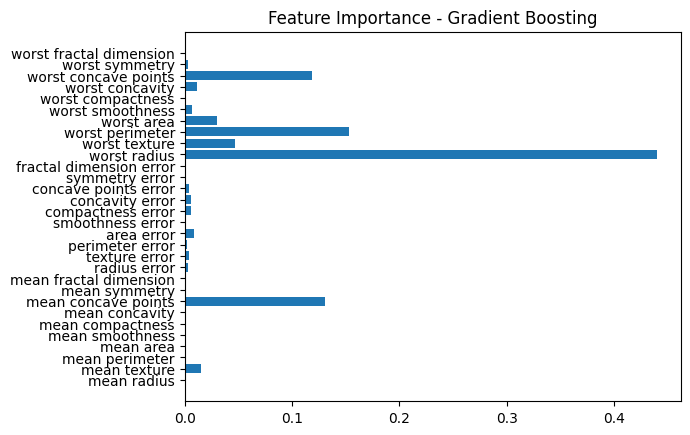

In [23]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X, y)
plt.barh(cancer.feature_names, gb_classifier.feature_importances_)
plt.title("Feature Importance - Gradient Boosting")
plt.show()

In [4]:
#17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score.
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test)))

R² Score: 0.9247486820519242


In [5]:
#18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_model.predict(X_test)))

XGBoost Accuracy: 0.9473684210526315


In [8]:
#19. Train a CatBoost Classifier and evaluate using F1-Score.
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you may need to load and split your data like this:
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)
print("F1 Score:", f1_score(y_test, cb_model.predict(X_test), average='macro'))

F1 Score: 0.9165217391304347


In [9]:
#20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

reg = XGBRegressor()
reg.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))

MSE: 0.08108880370855331


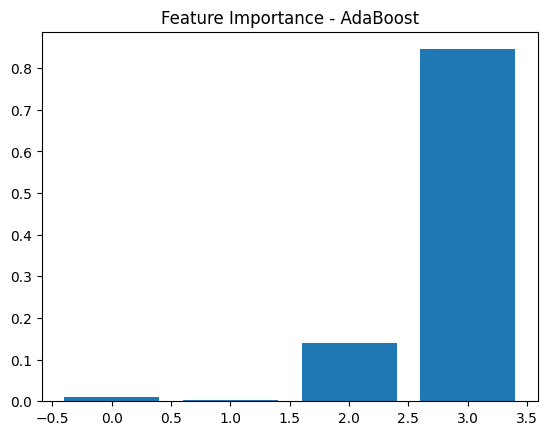

In [10]:
#21. Train an AdaBoost Classifier and visualize feature importance.
import numpy as np
importance = model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance - AdaBoost")
plt.show()

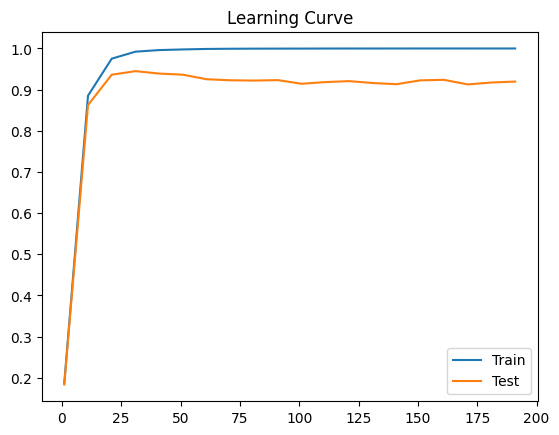

In [11]:
#22.Train a Gradient Boosting Regressor and plot learning curves.
train_errors, test_errors = [], []
for i in range(1, 201, 10):
    gb = GradientBoostingRegressor(n_estimators=i)
    gb.fit(X_train, y_train)
    train_errors.append(gb.score(X_train, y_train))
    test_errors.append(gb.score(X_test, y_test))

plt.plot(range(1, 201, 10), train_errors, label="Train")
plt.plot(range(1, 201, 10), test_errors, label="Test")
plt.title("Learning Curve")
plt.legend()
plt.show()

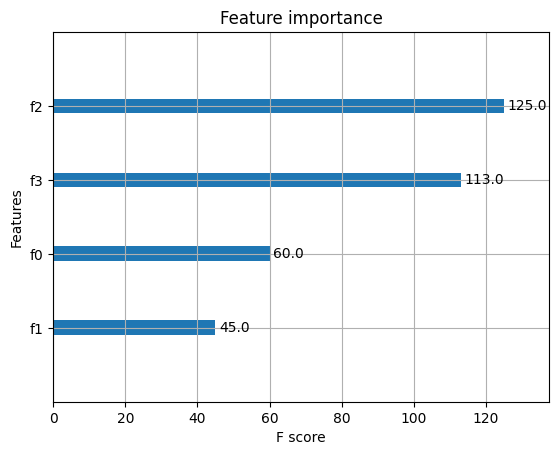

In [12]:
#23.Train an XGBoost Classifier and visualize feature importance.
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

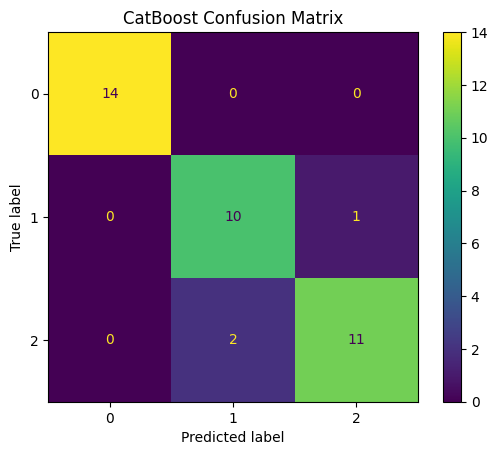

In [13]:
#24.Train a CatBoost Classifier and plot the confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(cb_model, X_test, y_test)
plt.title("CatBoost Confusion Matrix")
plt.show()

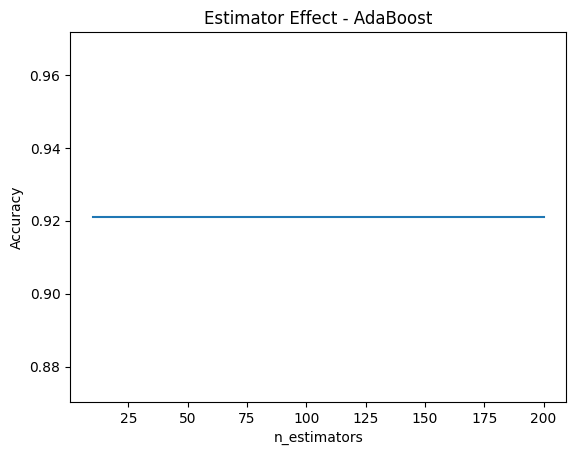

In [14]:
#25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.
estimators = [10, 50, 100, 200]
accs = []
for n in estimators:
    ab = AdaBoostClassifier(n_estimators=n)
    ab.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, ab.predict(X_test)))

plt.plot(estimators, accs)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Estimator Effect - AdaBoost")
plt.show()

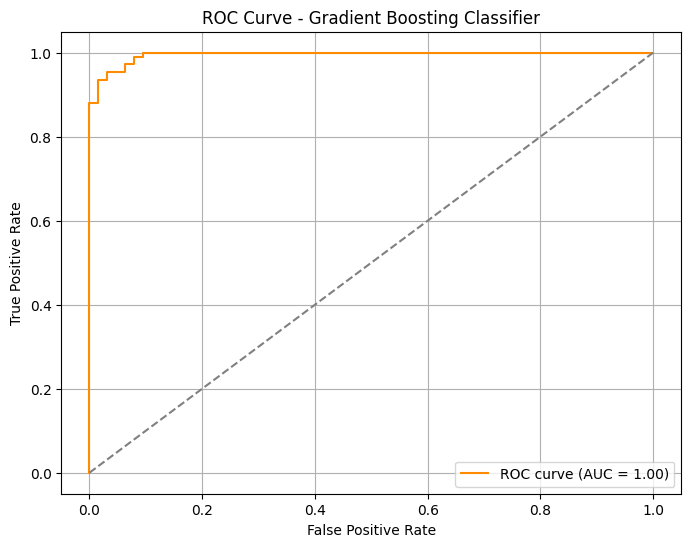

In [25]:
#26.Train a Gradient Boosting Classifier and visualize the ROC curve.
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test) # Use the classifier model here
plt.title("Gradient Boosting ROC Curve")
plt.show()

In [16]:
#27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV.
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.01, 0.1, 0.2]}
search = GridSearchCV(XGBRegressor(), params, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)
print("Best Params:", search.best_params_)

Best Params: {'learning_rate': 0.2}


In [17]:
#28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.
cb = CatBoostClassifier(auto_class_weights='Balanced', verbose=0)
cb.fit(X_train, y_train)
print("F1 (Balanced):", f1_score(y_test, cb.predict(X_test), average='macro'))

F1 (Balanced): 0.9165217391304347


In [18]:
#29.Train an AdaBoost Classifier and analyze the effect of different learning rates.
rates = [0.01, 0.1, 1.0]
for lr in rates:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    print(f"LR={lr}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")

LR=0.01, Accuracy=0.9210526315789473
LR=0.1, Accuracy=0.9210526315789473
LR=1.0, Accuracy=0.9210526315789473


In [19]:
#30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
from sklearn.metrics import log_loss
model = XGBClassifier(objective='multi:softprob', num_class=3)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))

Log Loss: 0.3413626599560064
